In [1]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/

/content/drive/MyDrive


In [6]:
cd ТМИ/ТМИ

/content/drive/MyDrive/ТМИ/ТМИ


In [7]:
cd 2016/

/content/drive/MyDrive/ТМИ/ТМИ/2016


In [8]:
#PALETTE = sns.color_palette('deep', n_colors=30) # цвета, отражающую глубину значений в векторном пространстве
PALETTE = sns.color_palette("crest", as_cmap=True);
CMAP = PALETTE
RANDOM_STATE = 42

In [10]:
df_2016 = pd.read_excel('RS-41at 01.01.2016 0-00-00 - 01.03.2016 23-59-00.xlsx'); # считываем в датафрейм эксель файл ~2 минуты

In [11]:
df_2016 = df_2016.rename(columns={ df_2016.columns[0]: "date" })

In [ ]:
df_2016.head()

,date,"Ubs,V","Ibs,A","Isun,A","RKPT,b","Sst0x,b","Sst1x,b","Ipt0,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A","Ipt7,A","Ipt10,A","Ipt11,A","Ipt12,A","Ipt13,A","Ipt14,A","Ipt15,A","Ipt16,A","Ipt17,A",Mag0F,Mag10,Mag11,Mag12,Mag13,Mag14,Mag15,Mag16,"Isp1,A","Isp2,A","Isp3,A","Isp4,A","Isp5,A","Isp6,A","Isp7,A","Isp8,A",Mag07,...,"TDS21,C","TPrd1,C","TDS23,C","TDS24,C","iTMO,s","iTMD,s",U-chCAN,"SSoTR,b","STDS12,b","STDS34,b",res0,"U-MAG,o","U-KPT1,o","U-KPT2,o",U-InfGBV,"U-GBV,o",U-InfNAP,"TmUpr,b","RKwit,b","Rmorz,b",IntK_TM,"RPrd1,b","RPrm1,b","RPrd2,b","RPrm2,b","FPrd1,V","RPrd1,V","FPrd2,V","RPrd2,V","SPrm1,V","SPrm2,V","VP,d","ShKom,d","Kmnd,d","God,h","Mes,h","Den,h","Chas,h","Min,h",Sec
0,2016-01-03 03:26:12,13.71,1.52,0.99,1100000.0,110.0,0.0,0.0,0.07,1.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0,86,40,B4,D0,3D,11,11,0.0,0.00,0.0,0.99,0.0,0.0,0.0,0.0,22,...,CB,23.0,C9,26.0,60.0,180.0,10.0,0.0,0.0,0.0,AF,620.0,536.0,567.0,700.0,463.0,770.0,0.0,10010000.0,0.0,1000101.0,11.0,10.0,111.0,110.0,0.00,0.00,1.23,0.22,1.09,1.17,0.0,38.0,2027.0,16,1,4,13,34,38
1,2016-01-03 03:27:12,13.78,1.47,1.31,1100000.0,110.0,0.0,0.0,0.04,1.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0,86,40,B4,D0,3D,11,11,0.0,0.05,0.0,0.84,0.2,0.0,0.2,0.0,22,...,CB,23.0,C9,26.0,60.0,180.0,10.0,0.0,0.0,0.0,AF,620.0,536.0,567.0,700.0,463.0,770.0,0.0,10010000.0,0.0,1000101.0,11.0,10.0,111.0,110.0,0.00,0.00,1.23,0.22,1.70,1.01,0.0,40.0,2027.0,16,1,4,13,35,42
2,2016-01-03 03:28:12,14.30,0.24,0.00,1100000.0,110.0,0.0,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0,86,40,B4,D0,3D,11,11,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,22,...,CB,25.0,C9,28.0,60.0,180.0,10.0,0.0,0.0,0.0,AF,620.0,525.0,556.0,700.0,463.0,770.0,0.0,10010000.0,0.0,1000101.0,11.0,10.0,111.0,110.0,0.02,0.00,0.00,0.00,0.90,0.99,0.0,23.0,2022.0,16,1,3,3,28,12
3,2016-01-03 03:29:12,14.24,0.21,0.00,1100000.0,110.0,0.0,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0,86,40,B4,D0,3D,11,11,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,22,...,CB,25.0,C9,28.0,60.0,180.0,10.0,0.0,0.0,0.0,AF,620.0,525.0,556.0,700.0,463.0,770.0,0.0,10010000.0,0.0,1000101.0,11.0,10.0,111.0,110.0,0.02,0.00,0.00,0.00,0.91,0.99,0.0,23.0,2022.0,16,1,3,3,29,12
4,2016-01-03 03:30:12,14.17,0.21,0.00,1100000.0,110.0,0.0,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A0,86,40,B4,D0,3D,11,11,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,22,...,CB,25.0,C9,28.0,60.0,180.0,10.0,0.0,0.0,0.0,AF,620.0,525.0,556.0,700.0,463.0,770.0,0.0,10010000.0,0.0,1000101.0,11.0,10.0,111.0,110.0,0.00,0.02,0.02,0.00,0.90,1.01,0.0,23.0,2022.0,16,1,3,3,30,12


In [ ]:
df_dtc_ab = df_2016[['TDS1,C','TDS2,C','TDS3,C','TDS4,C','TDS5,C','TDS6,C']]

In [12]:
df_i = df_2016[['Ipt0,A',	'Ipt1,A',	'Ipt2,A',	'Ipt3,A',	'Ipt4,A',	'Ipt5,A',	'Ipt6,A',	'Ipt7,A',	'Ipt10,A',	'Ipt11,A',	'Ipt12,A',	'Ipt13,A',	'Ipt14,A',	'Ipt15,A',	'Ipt16,A',	'Ipt17,A']];

In [ ]:
df_sep = df_2016[['Ubs,V'	,'Ibs,A','Isun,A']];

In [ ]:
#df_target = pd.DataFrame(df_2016.date.values.astype(np.float64));

In [ ]:
#df_sep['target'] = df_2016.date.values.astype(np.float64);
#df_dtc_ab['target'] = df_2016.date.values.astype(np.float64);

In [14]:
df_i['target'] = df_2016.date.values.astype(np.float64); # data в timestamp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#clean_dataset(df_sep); # найти восполнения пробелов методы.
#clean_dataset(df_dtc_ab);

In [15]:
df_i

,"Ipt0,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A","Ipt7,A","Ipt10,A","Ipt11,A","Ipt12,A","Ipt13,A","Ipt14,A","Ipt15,A","Ipt16,A","Ipt17,A",target
0,0.0,0.07,1.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
1,0.0,0.04,1.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
2,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
3,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
4,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67377,0.0,0.04,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456876e+18
67378,0.0,0.04,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456877e+18
67379,0.0,0.09,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456877e+18
67380,0.0,0.04,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456877e+18


In [ ]:
header_values = ['Ubs,V'	,'Ibs,A','Isun,A'] # хэдер
features_sep = list(header_values) # хэдер конвертируется в список
 

In [17]:
header_values = ['Ipt0,A',	'Ipt1,A',	'Ipt2,A',	'Ipt3,A',	'Ipt4,A',	'Ipt5,A',	'Ipt6,A',	'Ipt7,A',	'Ipt10,A',	'Ipt11,A',	'Ipt12,A',	'Ipt13,A',	'Ipt14,A',	'Ipt15,A',	'Ipt16,A',	'Ipt17,A'] # хэдер
features_i = list(header_values) # хэдер конвертируется в список

In [20]:
cols_to_remove = []
df_i_column = df_i[features_i].columns 
# Отчистка от нечисловых значений
for col in df_i_column:
    try:
        _ = df_i[col].astype(float)
    except ValueError:
        print('Couldn\'t convert %s to float' % col)
        #values_dataset[col] = float(int(values_dataset[col], 16)) 
        cols_to_remove.append(col)     # из 16-ричной во float
        pass
# здесь мы удаляем колонки, в которых содержатся нечисловые значения.
df_i = df_i[[col for col in df_i.columns if col not in cols_to_remove]]

In [24]:
df_i['target']

0        1.451792e+18
1        1.451792e+18
2        1.451792e+18
3        1.451792e+18
4        1.451792e+18
             ...     
67377    1.456876e+18
67378    1.456877e+18
67379    1.456877e+18
67380    1.456877e+18
67381    1.456877e+18
Name: target, Length: 67382, dtype: float64

In [ ]:
cols_to_remove = []
df_sep_column = df_i[features_sep].columns 
# Отчистка от нечисловых значений
for col in df_sep_column:
    try:
        _ = df_sep[col].astype(float)
    except ValueError:
        print('Couldn\'t convert %s to float' % col)
        #values_dataset[col] = float(int(values_dataset[col], 16)) 
        cols_to_remove.append(col)     # из 16-ричной во float
        pass
# здесь мы удаляем колонки, в которых содержатся нечисловые значения.
df_sep = df_sep[[col for col in df_sep.columns if col not in cols_to_remove]]

In [26]:
df_i = df_i.fillna(0)

In [34]:
def plot_2d(x, y, title, xlabel="1st vector", ylabel="2nd vector", vd = df_i['target']):
    sns.set_style("darkgrid")
    plt.rcParams["figure.figsize"] = (40,40)
    plt.scatter(x, y, c=vd, cmap=CMAP, s=40)  
    plt.title(title, fontsize=20, y=1.03)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [ ]:
def plot_3d(x, y, z, title):
    sns.set_style('whitegrid')
    plt.rcParams["figure.figsize"] = (40,40)
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
   # ax.scatter(
    ax.scatter(x, y, z,
               c=df_sep['target'],
               cmap=CMAP,
               s=)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st vector", fontsize=fsize)
    ax.set_ylabel("2nd vector", fontsize=fsize)
    ax.set_zlabel("3rd vector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [ ]:
PALETTE # переделать на градиент 

In [ ]:
# пробелы переделать
# лейблы вывести.
# разметка данных

In [22]:
df_i

,"Ipt0,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A","Ipt7,A","Ipt10,A","Ipt11,A","Ipt12,A","Ipt13,A","Ipt14,A","Ipt15,A","Ipt16,A","Ipt17,A",target
0,0.0,0.07,1.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
1,0.0,0.04,1.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
2,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
3,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
4,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.451792e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67377,0.0,0.04,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456876e+18
67378,0.0,0.04,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456877e+18
67379,0.0,0.09,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456877e+18
67380,0.0,0.04,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456877e+18


In [27]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE) 
points = tsne.fit_transform(df_i[features_i]) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


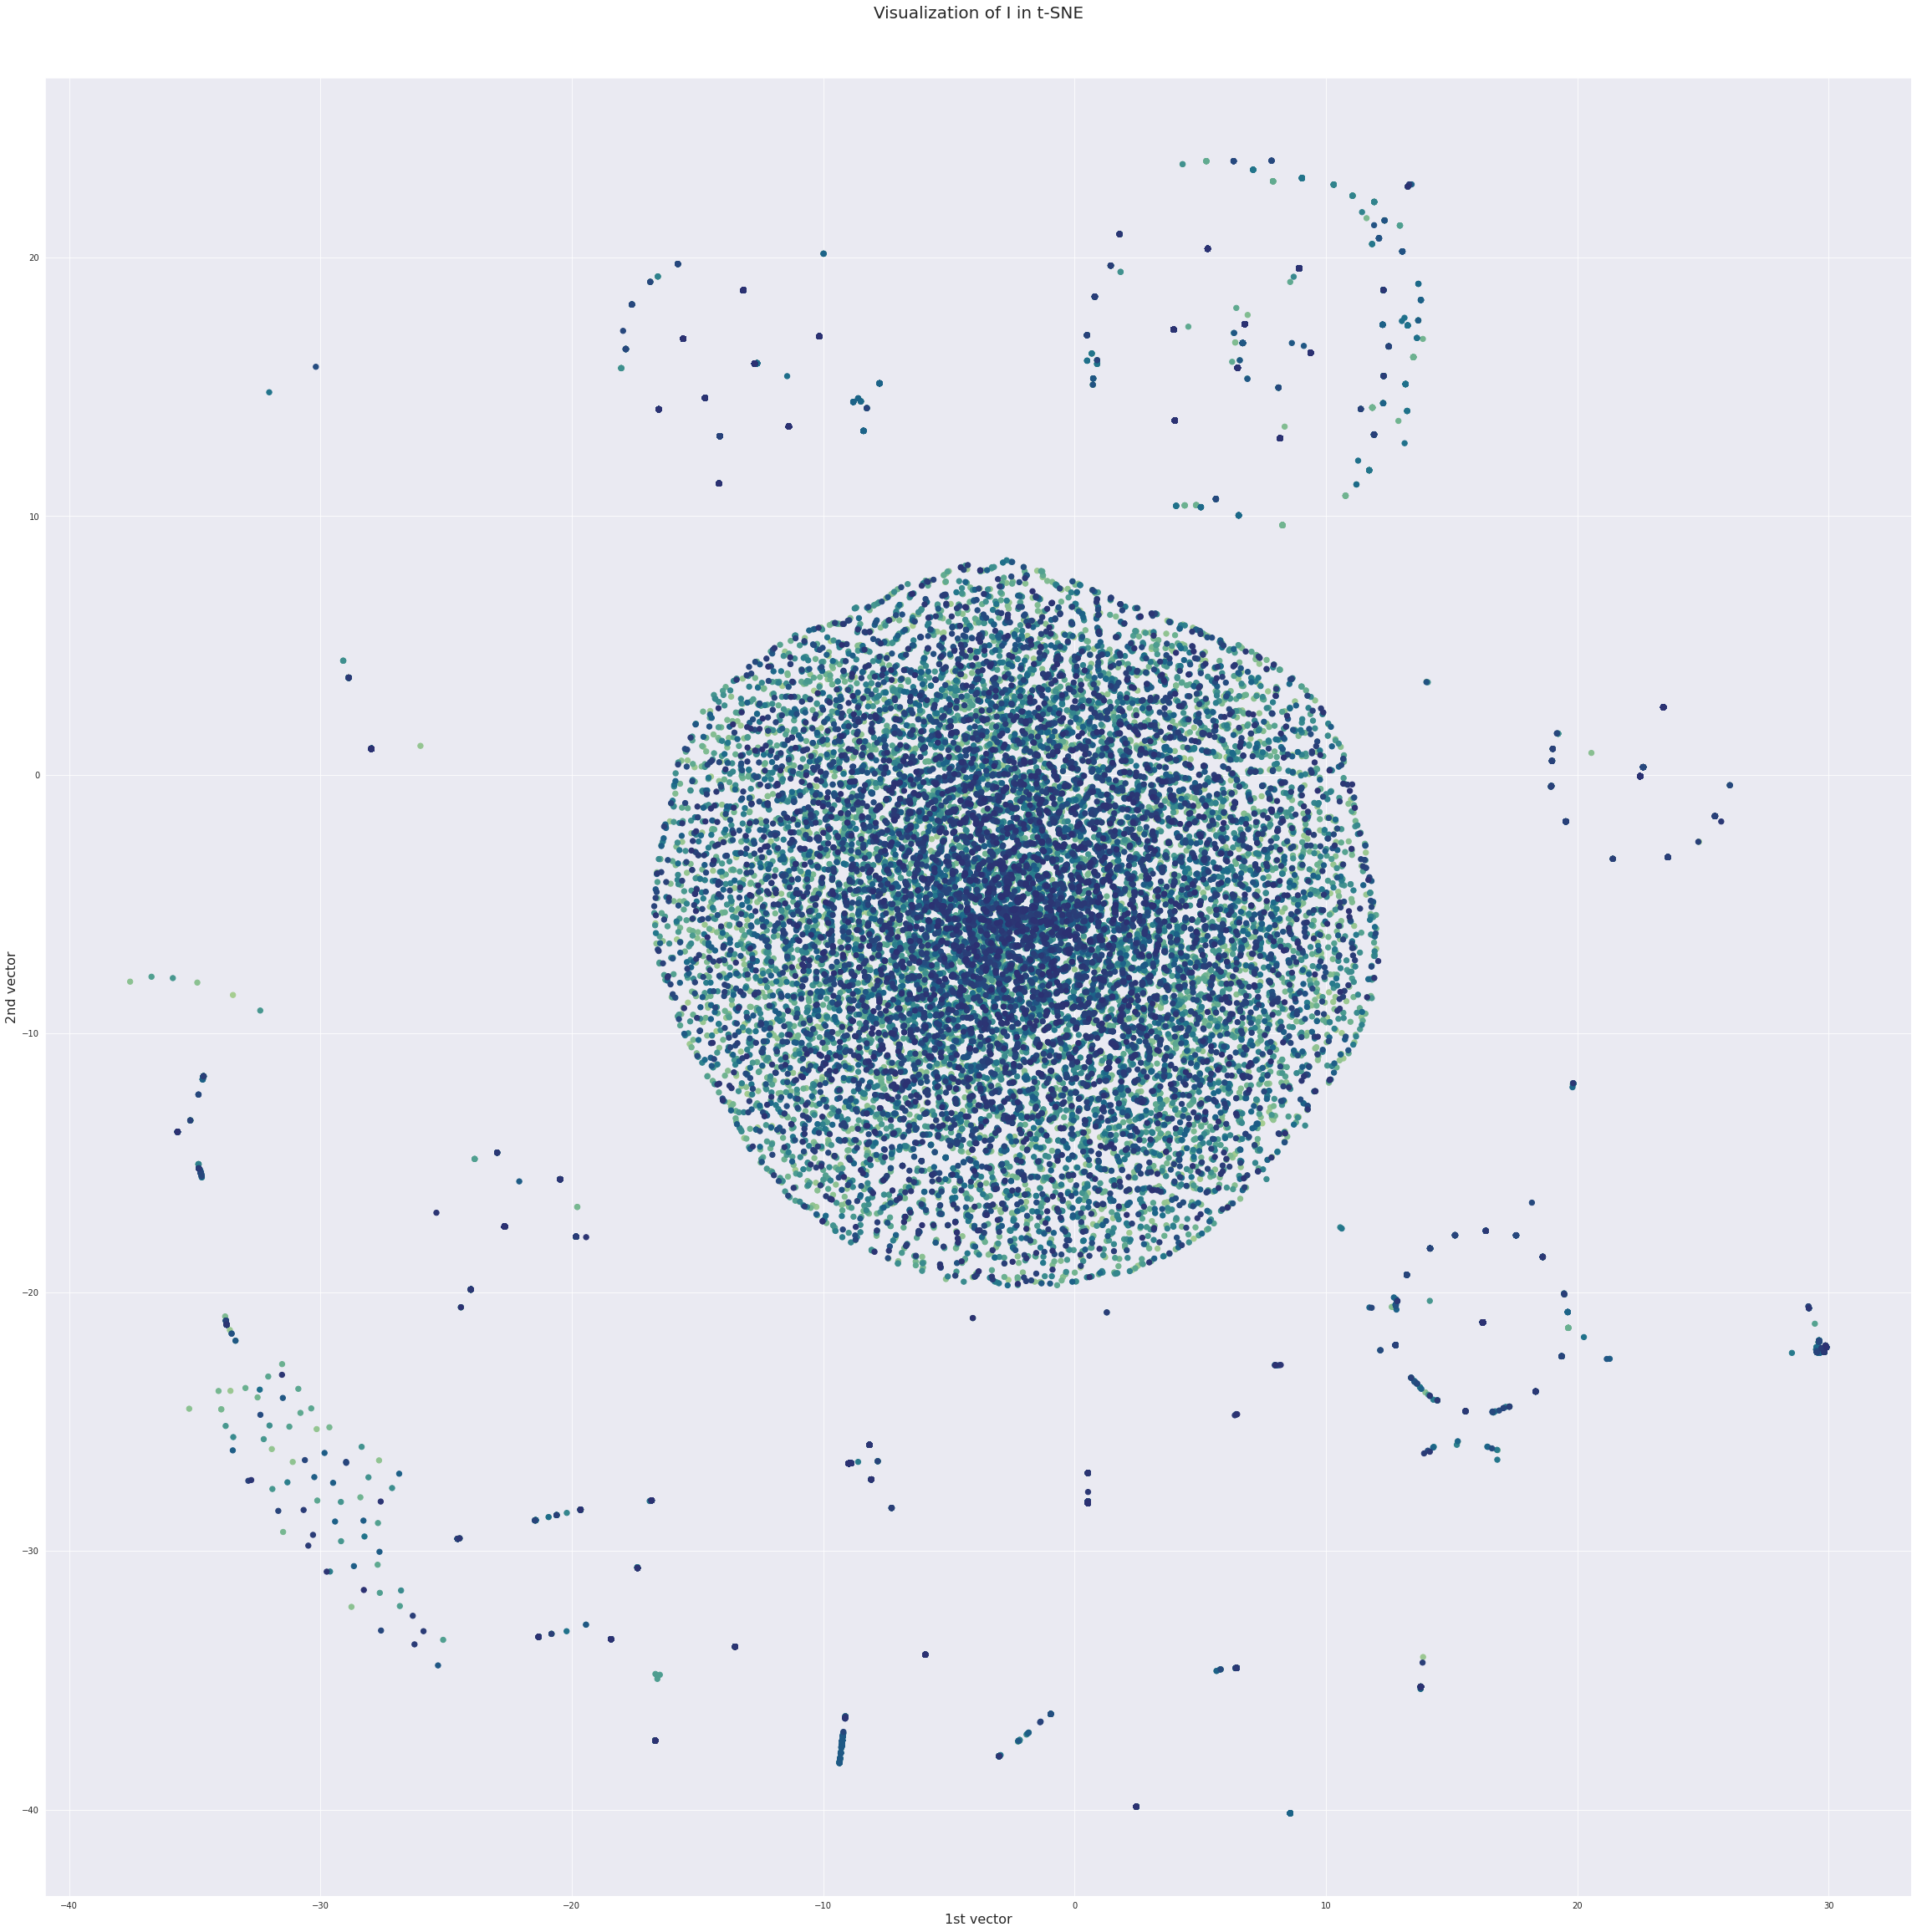

In [35]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    
    title = 'Visualization of I in t-SNE',
    vd = df_i['target'])

In [ ]:
tsne = TSNE(n_components=3, n_iter=1000, random_state=RANDOM_STATE) 
points = tsne.fit_transform(df_i[features_i]) 

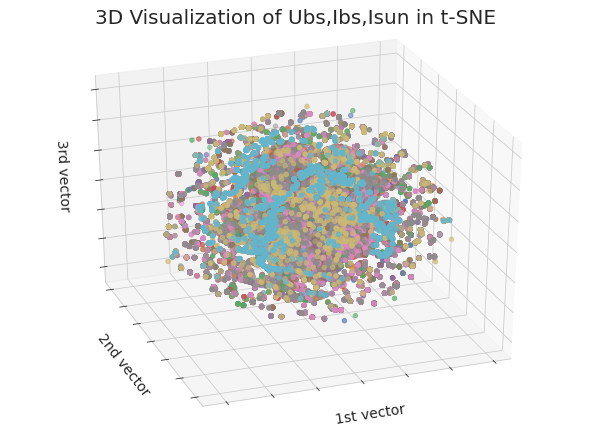

In [ ]:
plot_3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    title = '3D Visualization of Ubs,Ibs,Isun in t-SNE')